### Intro

In this section, we are going to look at the concept of derivatives. For this purpose, we import the libraries for different operations and visualization.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Forward Pass

We are going to learn about forward pass and kind of visualize it.

### Define a Function

Let's define a quadratic function :
\begin{equation}
f(x) = 3x^2 - 4x + 5
\end{equation}


In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

Let's calculate the function value for a random value. 3 in this case.


In [3]:
f(3.0)

20.0

Plot the function.

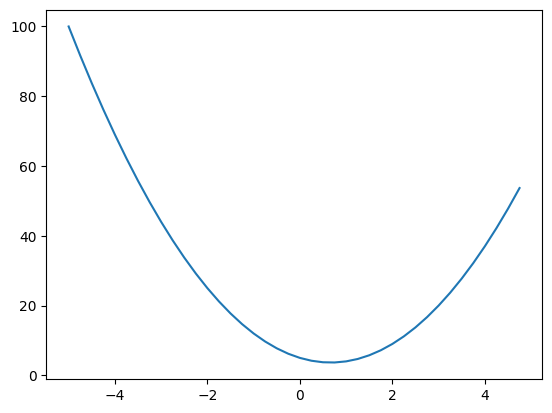

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

Consider h, a very small incremental value. Now, calculate the value of function for both ***f(x)*** and ***f(x+h)***.

In [5]:
h = 0.000001
x = 3.0
print(f"{f(x)}")
print(f"{f(x+h)}")

20.0
20.000014000003002


Calculate the difference.

In [6]:
f(x+h) - f(x)

1.4000003002223593e-05

Calculate the slope.

In [7]:
(f(x+h) - f(x))/h

14.000003002223593

Now, let's look at a bit complex function.

In [8]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [9]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


###  Create the Value Object

We will work with neural networks and in order to do that we need some data structures to manage that. So, To start,<br>
Let's create a ***Value*** object. <br>
Value class takes a single scalar value that it wraps and keep track of.

In [10]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

Python will automatically make use of repr function for displaying value object.

In [11]:
a = Value(2.0)

In [12]:
a

Value(data=2.0)

In [13]:
b = Value(3.0)

In [14]:
b

Value(data=3.0)

Let's Try to add a & b that are basically same datatype.

In [15]:
#a+b

The above expression gives the following error because python doesnot know how to add two value objects.
```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-16-ca730b97bf8a> in <cell line: 1>()
----> 1 a+b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'
```
*Check by removing the comment*

Now, Let's define a function to add two value objects and update the Value class.

In [16]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

```
out = Value(self.data + other.data)
```
This expression helps addition of two datatypes.<br>
Basically, now when we implement `a + b`, following operation happens.
```
a.__add__(b)
```


In [17]:
a = Value(261.0)
b = Value(-343.0)

In [18]:
# Adding

a + b

Value(data=-82.0)

Again, Let's update the value class with a function to multiply two objects.

In [19]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out

In [20]:
a = Value(6.0)
b = Value(-3.0)
c = Value(20.0)

In [21]:
a * b + c

Value(data=2.0)

```
out = Value(self.data * other.data)
```
This expression helps addition of two datatypes.<br>
Basically, now when we implement `a * b + c`, following operation happens.
```
(a.__mul__(b)).__add__(c)
```


What we are missing until now is the expression graphs. <br>
So, basically we need to keep pointers about what values produce what other values.<br>
Here, we'll define a new variable named <code>_children </code> and it'll be an empty tuple by default.<br>
And we will introduce a new variable called <code>_prev </code> in the class that is basically set of <code>_children </code>

In [22]:
class Value:

    def __init__(self, data, _children = ()):
        self.data = data
        self._prev = set(_children)

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other))
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other))
        return out

When we start, `_children` will just be an empty set.<br>
But, when an operation is performed, `_children` will be fed in the end.<br>
Just like <br>
`out = Value(self.data + other.data, (self, other))`<br>
`out = Value(self.data * other.data, (self, other))`
<br>
Here, we added two parameter `(self, other)` which is basically the variables that we operated on. <br>
i.e., We are keeping the track of previous values.

In [23]:
a = Value(6.0)
b = Value(-3.0)
c = Value(20.0)
d = a * b + c

In [24]:
d

Value(data=2.0)

In [25]:
d._prev

{Value(data=-18.0), Value(data=20.0)}

So, when we did `d._prev`, we got two values that we operated on.<br><br>
We now know the children Value of the output Value, but we still have not tracked the operation that we did on those Values.<br>
For this problem, Let's update our Value class.<br><br>

We add a new variable `_op` which is an empty string by default.

In [26]:
class Value:

    def __init__(self, data, _children = (), _op = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

When we start, `_op` will just be an empty string.<br>
But, when an operation is performed, `_op` will be fed in the end.<br>
Just like <br>
`out = Value(self.data + other.data, (self, other), '+')`<br>
`out = Value(self.data * other.data, (self, other), '*')`
<br>
Here, we added a string which is basically the operation performed. <br>
i.e., We are keeping the track of operations.

In [27]:
a = Value(16.0)
b = Value(-3.0)
c = Value(80.0)
d = a * b + c

In [28]:
d

Value(data=32.0)

Now, we can not only do `d._prev`, we can also look at what specific operations we performed using `d._op`.

In [29]:
d._prev

{Value(data=-48.0), Value(data=80.0)}

In [30]:
d._op

'+'

Hence, we know that <br>
```
d = Value(data=32.0)
```
is generated using two Values<br>
```
{Value(data=-48.0), Value(data=80.0)}
```
And the operation performed on those Values to generate the output is
```
'+'.
```

Expressions we are using as examples are quiet smaller, but we'd like to work on more complex ones.<br>
It would be better if we created a mechanism to visualize the operations.

In [31]:
from graphviz import Digraph

def trace(root):

    # Set of all nodes and edges in graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges



def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir':'LR'})

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ data %.4f }"%(n.data, ), shape='record')

        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)


    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

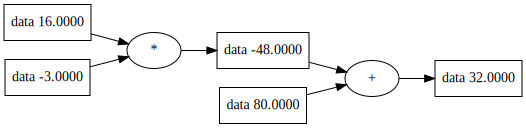

In [32]:
draw_dot(d)

Updating the class Value to add labels:

In [33]:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [34]:
a = Value(16.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(80.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'

Updating the visualization function to add labels:

In [35]:
from graphviz import Digraph

def trace(root):

    # Set of all nodes and edges in graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges



def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir':'LR'})

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ %s | data %.4f }"%(n.label, n.data), shape='record')

        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)


    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

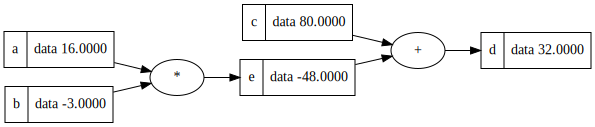

In [36]:
draw_dot(d)

Let's do some even complex operations.

In [37]:
a = Value(16.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(80.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-20.0, label = 'f')
L = d * f; L.label = 'L'
L

Value(data=-640.0)

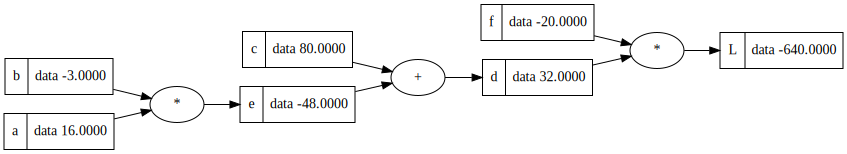

In [38]:
draw_dot(L)

### Backward Pass

Let's learn about back propagation and sort of calculate gradients and store them.<br><br>

Fpr that purpose, we introduce a new variable known as `grad` which is instantiated at 0. Let's update the Value class and visualization function.

In [39]:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [40]:
from graphviz import Digraph

def trace(root):

    # Set of all nodes and edges in graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges



def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir':'LR'})

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }"%(n.label, n.data, n.grad), shape='record')

        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)


    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

Perform some operations to visualize both data and gradients.

In [41]:
a = Value(16.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(80.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-20.0, label = 'f')
L = d * f; L.label = 'L'
L

Value(data=-640.0)

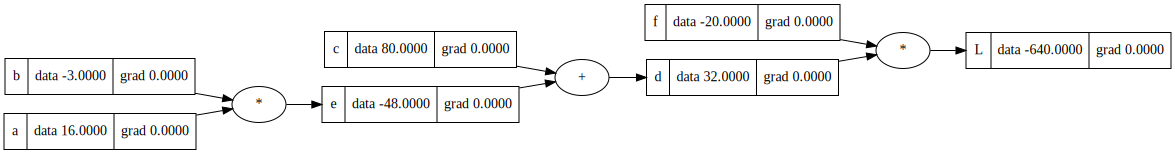

In [42]:
draw_dot(L)

Here, we have all the gradients equal to zero. <br>
This is because we havenot done any backpropagation. So, let's do it.

In [43]:
h = 0.00001

a = Value(16.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(80.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-20.0, label = 'f')
L = d * f; L.label = 'L'
L1 = L.data


a = Value(16.0+h, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(80.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-20.0, label = 'f')
L = d * f; L.label = 'L'
L2 = L.data

We are taking `L.data` because it's Value Object and we are taking the data from it.

In [44]:
print((L2-L1)/h)

59.99999998493876


Let's try something similar.

In [45]:
h = 0.00001

a = Value(16.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(80.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-20.0, label = 'f')
L = d * f; L.label = 'L'
L1 = L.data


a = Value(16.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(80.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-20.0, label = 'f')
L = d * f; L.label = 'L'
L2 = L.data + h

In [46]:
print((L2-L1)/h)

0.9999999974752426


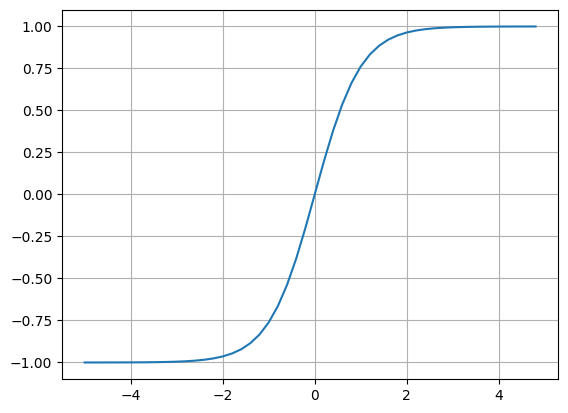

In [47]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

A Simple neural network.

In [48]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

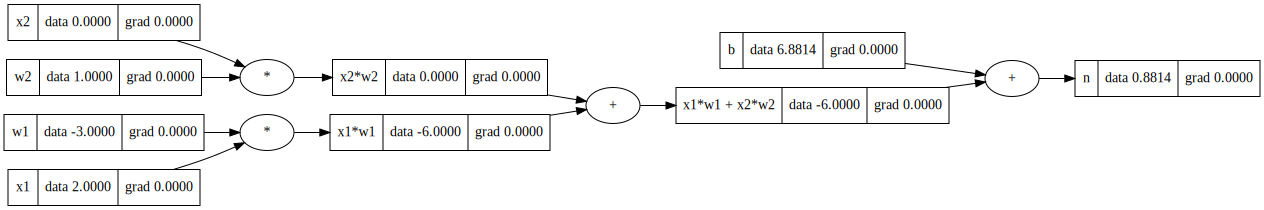

In [49]:
draw_dot(n)

Now, Let's add an activation function in the end. But before that, let's implement `tanh` function in the Value class.

In [50]:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) +1)
        out = Value(t, (self, ), 'tanh')
        return out

Let's use `tanh` as activation function in above neural network.

In [51]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

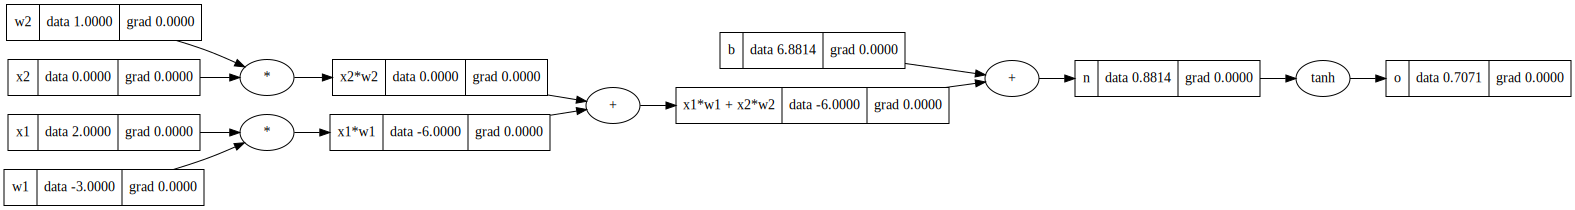

In [52]:
draw_dot(o)

In [53]:
o.grad = 1.0
n.grad = 0.5
b.grad = 0.5
x1w1x2w2.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

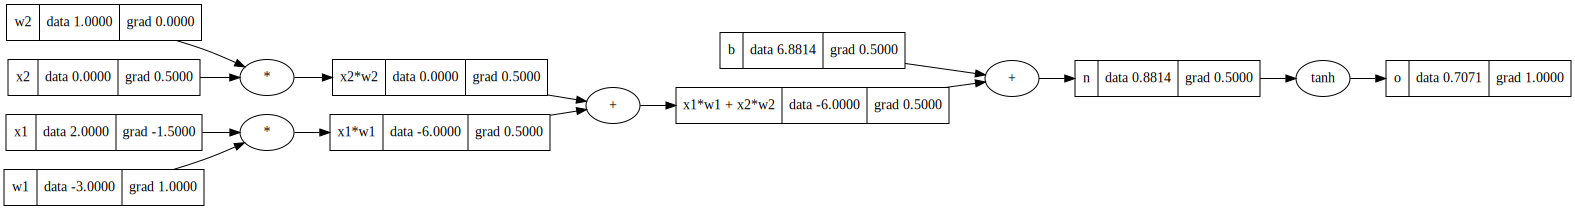

In [54]:
draw_dot(o)

We did backpropagation manually till now. But Let's implement it in Value class to automatically perform the operations.

In [55]:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"



    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) +1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad

        out._backward = _backward
        return out

In [56]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

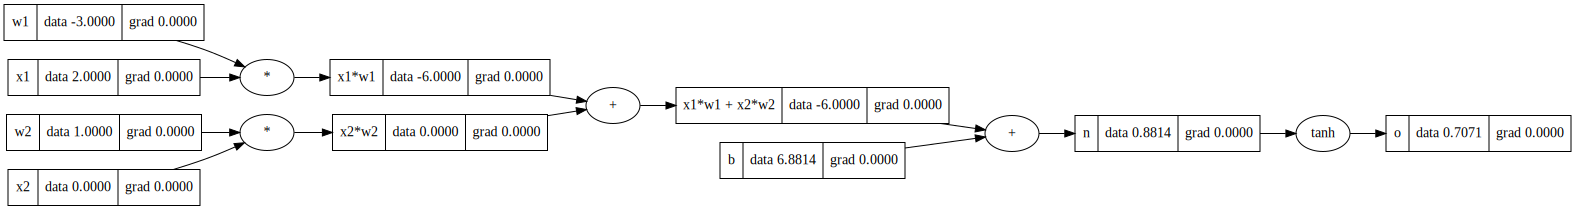

In [57]:
draw_dot(o)

Now, we have instantiated the operation again. But this time, <br>
we do not need to set the gradients manually. Instead we can just call <br>
`_backward()` method.

In [58]:
# Set the base case to 1.0
o.grad = 1.0

Backpropagate from o to n.

In [59]:
o._backward()

Let's visualize the graph again.

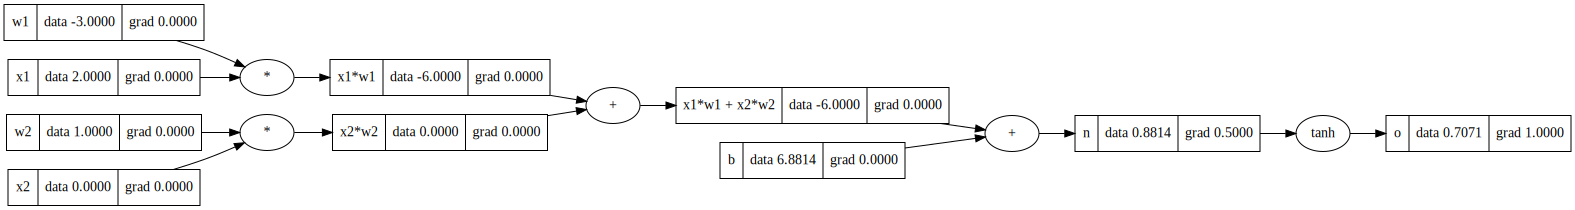

In [60]:
draw_dot(o)

Backpropagate from n to its components.

In [61]:
n._backward()

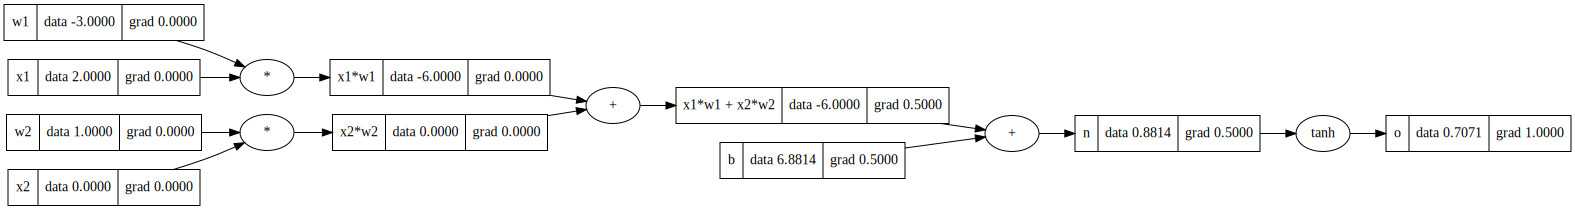

In [62]:
draw_dot(o)

Let's try to backpropagate form b.<br>
We know that b is a leaf node so it's value is none.<br>
Because we have defined it as `None` while defining the constructor.

In [63]:
print(b._backward())

None


Let's backpropagate from x1w1x2w2.

In [64]:
x1w1x2w2._backward()

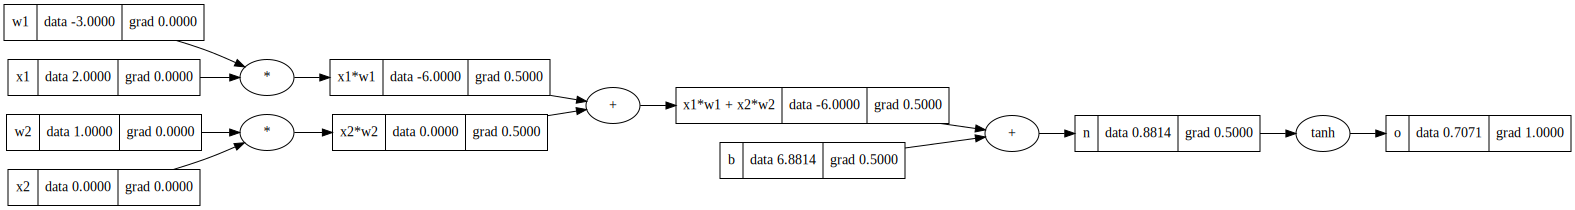

In [65]:
draw_dot(o)

And similarly from `x1w1` & `x2w2`.

In [66]:
x2w2._backward()
x1w1._backward()

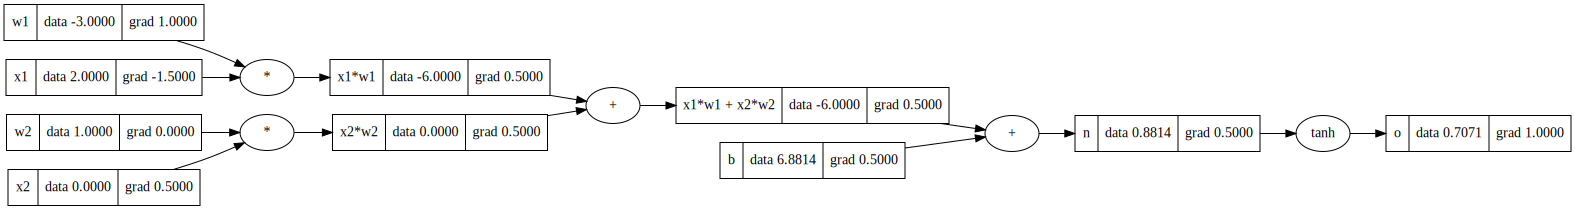

In [67]:
draw_dot(o)

We cannot just run backward everytime. So, we need a mechanism to automate it.<br>
Let's look at how can we do that & let's modify our Value class.

For this, we create a function called backward.<br>
Where, we find the order of computation and then reverse it to find the gradients because, we cannot be calculating <br>the gradients untill all the operations have been performed.

In [68]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [69]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

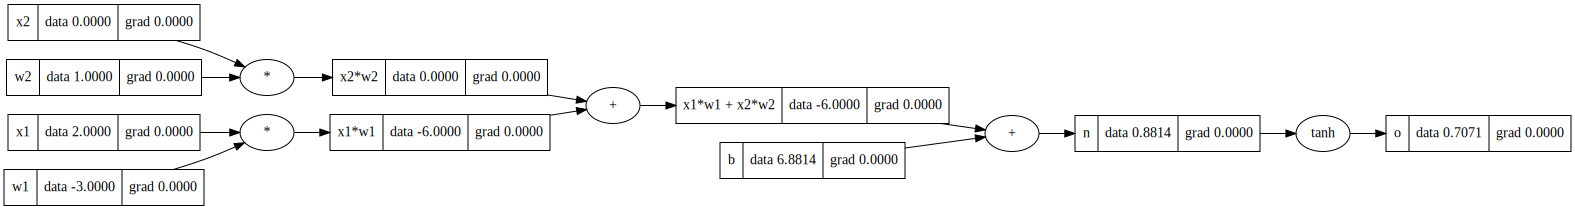

In [70]:
draw_dot(o)

In [71]:
o.backward()

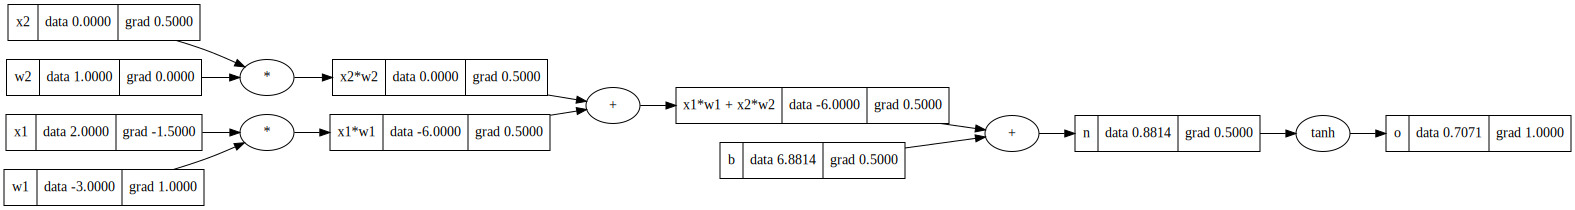

In [72]:
draw_dot(o)

Well, we've done it.<br>
We have successfully calculated the gradients by backward propagation.<br>

But, it's not robust yet. Let's see a loophole in our implementation.

In [73]:
a = Value(3.0, label = 'a')

In [74]:
b = a + a; b.label = 'b'

In [75]:
a

Value(data=3.0)

In [76]:
b

Value(data=6.0)

In [77]:
b.backward()

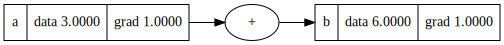

In [78]:
draw_dot(b)

Well, it's calculating the gradient but the gradient it calculated is wrong.

Let's exploit the loophole even more !

In [79]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

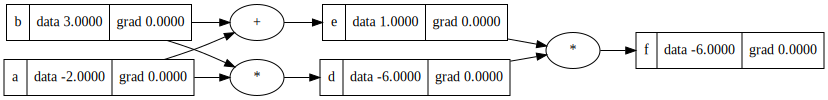

In [80]:
draw_dot(f)

In [81]:
f.backward()

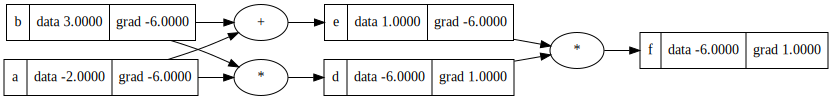

In [82]:
draw_dot(f)

While doing operation with same variables, both `self` and `other` are same. So, this problem arises. Let's solve it.

In [83]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [84]:
a = Value(3.0, label = 'a')

In [85]:
b = a + a; b.label = 'b'

In [86]:
a

Value(data=3.0)

In [87]:
b

Value(data=6.0)

In [88]:
b.backward()

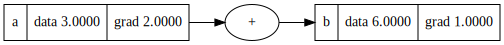

In [89]:
draw_dot(b)

Try for another operation too.

In [90]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

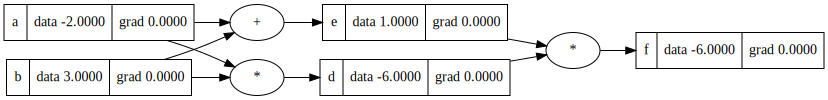

In [91]:
draw_dot(f)

In [92]:
f.backward()

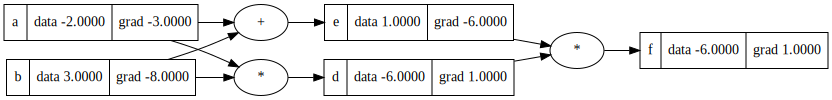

In [93]:
draw_dot(f)

Yayyyyy! We solved the loophole.

### More on Addition

In [94]:
a = Value(2.0)

#a += 1

```
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-94-d052d96cd3de> in <cell line: 3>()
      1 a = Value(2.0)
      2
----> 3 a += 1

<ipython-input-83-6fb2119552ee> in __add__(self, other)
     13
     14   def __add__(self, other):
---> 15     out = Value(self.data + other.data, (self, other), '+')
     16
     17     def _backward():

AttributeError: 'int' object has no attribute 'data'
```

The above commented operation gives the following error.<br>
This is because while defining addition, we've done something like:<br>
`out = Value(self.data + other.data, (self, other), '+')` <br>
So, when we add a and 1 together, it looks at `a.data` and `1.data`.<br>
But `1.data` is actually stupid. Now, In order to make addition possible with <br>
data types other than `Value` object, we can change the `Value` class in following manner:

In [95]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

Now, Let's do the above operation.

In [96]:
a = Value(2.0)

a += 1

print(a)

Value(data=3.0)


In [97]:
a = Value(2.0)

a *= 5

print(a)

Value(data=10.0)


Well, looks like we've solved it too. <br>
But wait, there's a catch.<br><br>

let's try `5 * a`.

In [98]:
a = Value(2.0)

#b = 5 * a

#print(b)

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-98-19dbb5bab12e> in <cell line: 3>()
      1 a = Value(2.0)
      2
----> 3 b = 5 * a
      4
      5 print(b)

TypeError: unsupported operand type(s) for *: 'int' and 'Value'
```

We still get error. Why is this?<br>
<br>
The above operation can be expressed as:<br>
`5.__mul__(a)`<br>
In this case, 5 is the `self` and `a` is the `other`. And our `self` doesnot have `.data` attribute.

Let's solve it :

In [99]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out


  def __rmul__(self, other):
    return self*other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

Checking Time:

In [100]:
a = Value(2.0)

b = 5 * a

print(b)

Value(data=10.0)


### Adding more functions

Let's add exponential function to our value class.

In [101]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out


  def __rmul__(self, other):
    return self*other


  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
        self.grad += out.data * out.grad

    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

Let's check it.

In [106]:
a = Value(2.0, label='a')

b = a.exp(); b.label = 'b'

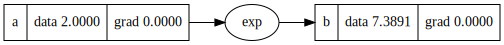

In [107]:
draw_dot(b)

In [108]:
b.backward()

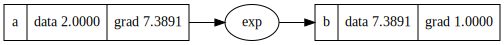

In [109]:
draw_dot(b)

### Expanding the division functionality

We would love to do division operation.<br>
There are many ways to do division. i.e what we call division is kind of a special case of something.<br>
Let's look at that.<br>

***a divided by b*** can be broken down to :<br>
```
a/b
a*(1/b)
a*(b**-1)
```

Let's work with `Value` class.

In [111]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out


  def __rmul__(self, other):
    return self*other

  def __truediv__(self, other):
    return self * other**-1

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
        self.grad += out.data * out.grad

    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [114]:
#Let's try

a = Value(9.0, label = 'a')
b = Value(3.0, label = 'b')

#c = a/b

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-113-95808baac4bd> in <cell line: 6>()
      4 b = Value(3.0, label = 'b')
      5
----> 6 c = a/b

<ipython-input-111-c7d17084fab1> in __truediv__(self, other)
     39
     40   def __truediv__(self, other):
---> 41     return self * other**-1
     42
     43   def exp(self):

TypeError: unsupported operand type(s) for ** or pow(): 'Value' and 'int'
```

We get the error above when we do division.<br>
This is because we have implemented division as <br>
`return self * other**-1` <br>
But we have not implemented the `pow` function, which is for the `**` operator.

In [115]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), 'THE ONLY SUPPORTED DATA TYPES FOR POWER ARE int/float.'
    out = Value(self.data ** other, (self, ), f'**{other}')

    def _backward(self):
        self.grad += (other * self.data ** (other-1)) * out.grad

    out._backward = _backward

    return out


  def __rmul__(self, other):
    return self*other

  def __truediv__(self, other):
    return self * other**-1

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
        self.grad += out.data * out.grad

    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

Now, when we do the above operation, it works.

In [116]:
#Let's try

a = Value(9.0, label = 'a')
b = Value(3.0, label = 'b')

c = a/b

In [117]:
c

Value(data=3.0)

Let's look at substraction.

In [121]:
#Let's try

a = Value(3.0, label = 'a')
b = Value(9.0, label = 'b')

#c = a - b

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-120-cb6e25107794> in <cell line: 6>()
      4 b = Value(9.0, label = 'b')
      5
----> 6 c = a - b

TypeError: unsupported operand type(s) for -: 'Value' and 'Value'
```

Substraction gives the error above. This is because we havenot implemented substraction.<br>
Let's do it.

In [122]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), 'THE ONLY SUPPORTED DATA TYPES FOR POWER ARE int/float.'
    out = Value(self.data ** other, (self, ), f'**{other}')

    def _backward(self):
        self.grad += (other * self.data ** (other-1)) * out.grad

    out._backward = _backward

    return out


  def __rmul__(self, other):
    return self*other

  def __truediv__(self, other):
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
        self.grad += out.data * out.grad

    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

It should work now.

In [123]:
#Let's try

a = Value(3.0, label = 'a')
b = Value(9.0, label = 'b')

c = a - b

In [124]:
c

Value(data=-6.0)